# **Predicción de éxito de películas en el cine con Técnicas de Regresión**
En este cuaderno se evaluarán modelos de regresión para predecir el éxito de las películas en términos de ingresos y aceptación, en base a un Dataset previo.

In [ ]:
#Importar las librerias

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy import stats
import seaborn as sns

## **1. Introducción al Dataset e identificación de las variables independientes más importantes que podrían influir en los ingresos brutos (columna Gross del Dataset)**

In [15]:
#Cargar el dataset

data = pd.read_csv('/content/movie_metadata_cleaned.csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3940 entries, 0 to 3939
Data columns (total 28 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   color                      3940 non-null   object 
 1   director_name              3940 non-null   object 
 2   num_critic_for_reviews     3940 non-null   float64
 3   duration                   3940 non-null   float64
 4   director_facebook_likes    3940 non-null   float64
 5   actor_3_facebook_likes     3940 non-null   float64
 6   actor_2_name               3940 non-null   object 
 7   actor_1_facebook_likes     3940 non-null   float64
 8   gross                      3940 non-null   float64
 9   genres                     3940 non-null   object 
 10  actor_1_name               3940 non-null   object 
 11  movie_title                3940 non-null   object 
 12  num_voted_users            3940 non-null   int64  
 13  cast_total_facebook_likes  3940 non-null   int64

In [ ]:
#Identificación de columnas numéricas
numerical_data = data.select_dtypes(include=['int64', 'float64'])

# Análisis de correlación respecto a "Gross" y gráficos de dispersión.

# Calcular la matriz de correlación
correlation_matrix = numerical_data.corr()

# Filtrar las correlaciones con respecto a la variable 'gross'
gross_correlation = correlation_matrix['gross'].sort_values(ascending=False)

# Mostrar las correlaciones
print(gross_correlation)

gross                        1.000000
num_voted_users              0.627374
num_user_for_reviews         0.551437
num_critic_for_reviews       0.462104
movie_facebook_likes         0.360125
actor_3_facebook_likes       0.285410
actor_2_facebook_likes       0.248769
duration                     0.246101
cast_total_facebook_likes    0.232349
imdb_score                   0.202808
actor_1_facebook_likes       0.146178
director_facebook_likes      0.141553
budget                       0.103299
aspect_ratio                 0.068000
title_year                   0.039339
facenumber_in_poster        -0.030891
Name: gross, dtype: float64


Se concluye que:

**num_voted_users**: Un mayor número de usuarios que votaron está fuertemente correlacionado con mayores ingresos brutos.
**num_user_for_reviews**: Un mayor número de reseñas de usuarios está positivamente correlacionado con los ingresos brutos.
**num_critic_for_reviews**: Un mayor número de reseñas de críticos está positivamente correlacionado con los ingresos brutos.

In [ ]:
# Análisis con gráficos de dispersión.

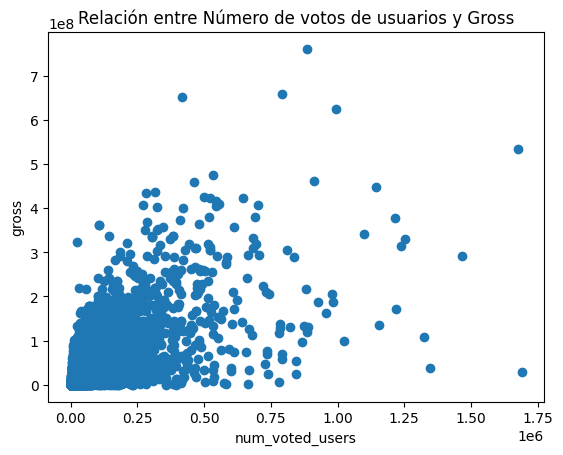

In [ ]:
x = data['num_voted_users'].values
y = data['gross'].values

# Visualización
plt.scatter(x, y)
plt.xlabel('num_voted_users')
plt.ylabel('gross')
plt.title('Relación entre Número de votos de usuarios y Gross')
plt.show()

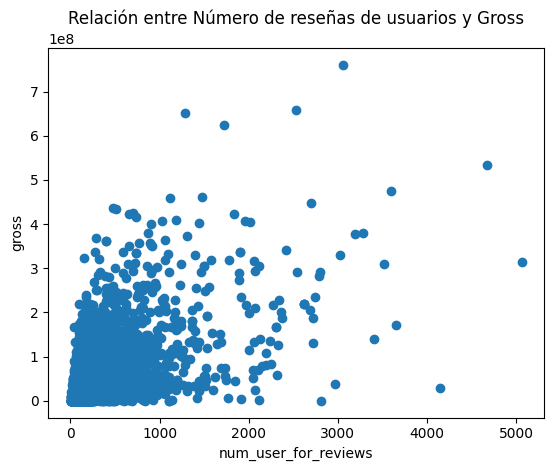

In [ ]:
x = data['num_user_for_reviews'].values
y = data['gross'].values

# Visualización
plt.scatter(x, y)
plt.xlabel('num_user_for_reviews')
plt.ylabel('gross')
plt.title('Relación entre Número de reseñas de usuarios y Gross')
plt.show()

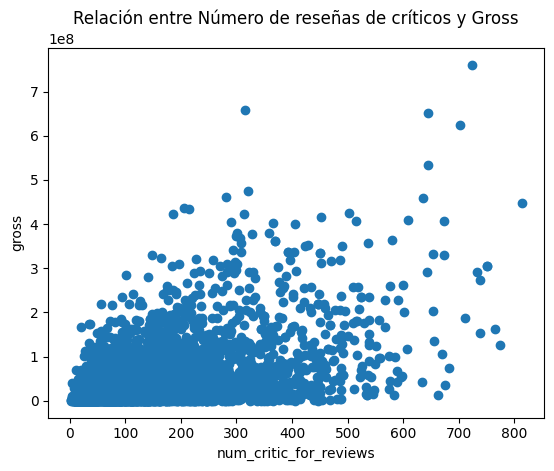

In [ ]:
x = data['num_critic_for_reviews'].values
y = data['gross'].values

# Visualización
plt.scatter(x, y)
plt.xlabel('num_critic_for_reviews')
plt.ylabel('gross')
plt.title('Relación entre Número de reseñas de críticos y Gross')
plt.show()

## **2. Entrenamiento y evaluación**

### **Modelo de regresión lineal usando las variables seleccionadas.**

In [19]:
def pendiente_prediccion(x, y, x_name, y_name):
  # Cálculo de la pendiente e intersección usando scipy
  slope, intercept, r_value, p_value, std_err = stats.linregress(x, y)

  # Generación de predicciones
  y_pred = slope * x + intercept

  # Visualización de la regresión
  plt.scatter(x, y, label='Datos')
  plt.plot(x, y_pred, color='red', label='Línea de Regresión')
  plt.xlabel(x_name)
  plt.ylabel(y_name)
  plt.legend()
  plt.title('Regresión Lineal usando Numpy y Scipy')
  plt.show()

  # Impresión de los resultados
  print("Pendiente:", slope)
  print("Intersección:", intercept)
  print("R-cuadrado:", r_value**2)
  return slope, intercept

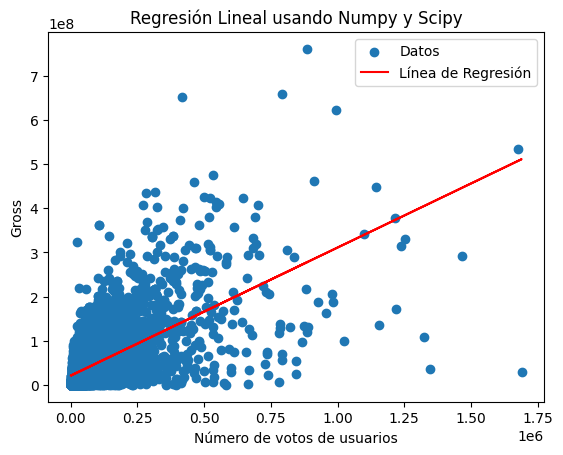

Pendiente: 289.9614315293313
Intersección: 20943741.106250186
R-cuadrado: 0.3935987417404933
Predicción de Gross (Numpy y Scipy) para 500000 vistas: 165924456.87091586


In [34]:
x = data['num_voted_users'].values
y = data['gross'].values
x_name = "Número de votos de usuarios"
y_name = "Gross"
pendiente_prediccion(x,y, x_name, y_name)
slope, intercept, r_value, p_value, std_err = stats.linregress(x, y)
# Generación de predicciones para n cantidad de Número de votos de usuarios
num_voted_users_new = 500000
prediccion = slope * num_voted_users_new + intercept
print("Predicción de Gross (Numpy y Scipy) para", num_voted_users_new,   "vistas:", prediccion)

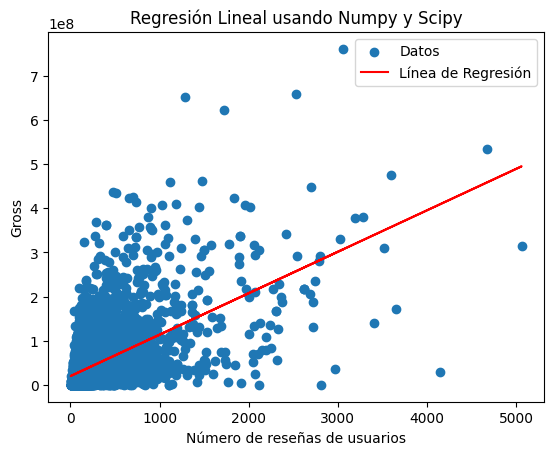

Pendiente: 93842.1512335474
Intersección: 19919574.733608972
R-cuadrado: 0.3040825147331461
Predicción de Gross (Numpy y Scipy) para 500000 vistas: 46940995191.50731


In [33]:
x = data['num_user_for_reviews'].values
y = data['gross'].values
x_name = "Número de reseñas de usuarios"
y_name = "Gross"
pendiente_prediccion(x,y, x_name, y_name)
slope, intercept, r_value, p_value, std_err = stats.linregress(x, y)
# Generación de predicciones para n cantidad de Número de reseñas de usuarios
num_user_for_reviews_new = 500000
prediccion = slope * num_voted_users_new + intercept
print("Predicción de Gross (Numpy y Scipy) para", num_user_for_reviews_new,   "vistas:", prediccion)

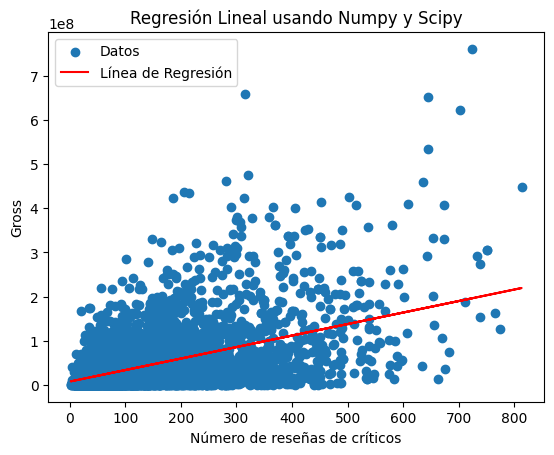

Pendiente: 260505.95524144656
Intersección: 7528230.916518293
R-cuadrado: 0.2135397163998157
Predicción de Gross (Numpy y Scipy) para 500000 vistas: 130260505851.6398


In [32]:
x = data['num_critic_for_reviews'].values
y = data['gross'].values
x_name = "Número de reseñas de críticos"
y_name = "Gross"
pendiente_prediccion(x,y, x_name, y_name)
slope, intercept, r_value, p_value, std_err = stats.linregress(x, y)
# Generación de predicciones para n cantidad de Número de reseñas de críticos
num_critic_for_reviews_new = 500000
prediccion = slope * num_voted_users_new + intercept
print("Predicción de Gross (Numpy y Scipy) para", num_critic_for_reviews_new,   "vistas:", prediccion)

### **Diagnóstico del modelo**